In [ ]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns
#Used for visualizing the confusion matrix as a heatmap, a more visually appealing way of representing data.
import os

In [ ]:
#Loading train and test dataset
x_train = np.load('/content/X_kannada_MNIST_train.npz')['arr_0']
x_test = np.load('/content/X_kannada_MNIST_test.npz')['arr_0']
y_train = np.load('/content/y_kannada_MNIST_train.npz')['arr_0']
y_test = np.load('/content/y_kannada_MNIST_test.npz')['arr_0']

In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [ ]:
'''We have 60K train cases, 10K test cases.
Each example is a 28 x 28 matrix representing the greyscale values.'''

'We have 60K train cases, 10K test cases.\nEach example is a 28 x 28 matrix representing the greyscale values.'

In [ ]:
#visualizing number from 0 to 9 in kannada

In [ ]:
def plot_random_digit():
    random_index = np.random.randint(0,x_train.shape[0])
    #This line selects a random index from x_train, which is the dataset of images.
    #np.random.randint(0, x_train.shape[0]) generates a random integer between 0 and the total number of images in x_train.
    #x_train.shape[0] gives the total number of images (rows) in the dataset. So, this line selects a random image from the dataset.
    plt.imshow(x_train[random_index], cmap='bone')
    #plt.imshow() is used to display an image.
    #x_train[random_index] selects the image corresponding to the randomly chosen index.
    #cmap='bone' is the colormap used to display the image. The 'bone' colormap produces a grayscale image with a slight sepia tone,
     making it easier to see the image details.
    plt.title(y_train[random_index])
    #plt.title() sets the title of the image, which is the label of the digit.
    #y_train[random_index] fetches the label (which digit the image represents) from y_train corresponding to the randomly selected image.
    plt.axis("Off")
    #plt.axis("Off") hides the axis, removing the ticks and labels around the image for a cleaner display.

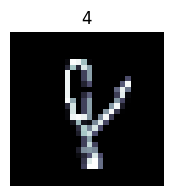

In [ ]:
plt.figure(figsize=[2,2])
plot_random_digit()


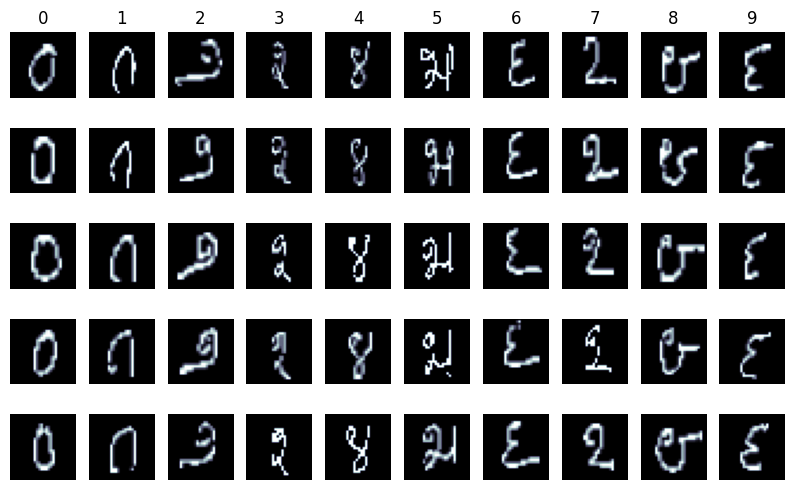

In [ ]:
plt.figure(figsize=[10,6])
#plt.figure(figsize=[10,6]): Sets the overall figure size to 10x6 inches, which is helpful when plotting multiple subplots.
for i in range(50):
    plt.subplot(5, 10, i+1)
    #plt.subplot(5, 10, i+1): Creates a grid of 5 rows and 10 columns for 50 images.
    plt.axis('Off')
    #plt.axis('Off'): Hides the axis for each subplot to remove unnecessary details.
    if i < 10:
        plt.title(y_train[i])
        #plt.title(y_train[i]): Adds the title (label) to the first 10 images.
    plt.imshow(x_train[i], cmap='bone')
    #plt.imshow(x_train[i], cmap='bone'): Displays the image with the 'bone' colormap.

In [ ]:
#Reshaping the datasets forusimg principle component Analysis
# Flatten the images to 1D arrays
#Principal Component Analysis (PCA) to reduce the dimensionality of the x_train and x_test datasets
(likely images like MNIST digits) by extracting the most important components that explain the data variance
from sklearn.decomposition import PCA
x_train_flat = x_train.reshape(x_train.shape[0], -1)
#x_train.shape[0] refers to the number of images.
-1 automatically infers the appropriate number of columns based on the total size (e.g., 784 for MNIST).
x_test_flat = x_test.reshape(x_test.shape[0], -1)

n_components = 10
pca = PCA(n_components=n_components)
#The n_components=10 specifies how many components to keep.
#PCA will reduce the data from its original dimensions (e.g., 784 for MNIST) to just 10, while preserving as much variance as possible.

# Fit and transform the PCA on the training data
x_train_pca = pca.fit_transform(x_train_flat)
#x_train_pca is the transformed version of x_train_flat where each image is now represented
by 10 principal components instead of the original pixel values.

# Transform the test data using the same PCA
x_test_pca = pca.transform(x_test_flat)
#We do not fit PCA on the test data; instead, we use the PCA model fitted on the training data to transform the test set.
This ensures that the same projection is applied to both training and test sets.

# Check the shapes of the transformed data
x_test_pca.shape, x_train_pca.shape
#This checks the shapes of the transformed data. After PCA transformation
#The original dimensions (e.g., 784 for MNIST) are reduced to 10, so the shape of the transformed data will be (number_of_samples, 10).
#x_train_pca.shape should be (number_of_training_samples, 10).
#x_test_pca.shape should be (number_of_test_samples, 10).

((10000, 10), (60000, 10))

In [ ]:
# importing Librarys
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from sklearn.metrics import confusion_matrix
#From sklearn.metrics, this function computes the confusion matrix from the true and predicted labels.
def plot_confusion_matrices(y_true, y_pred, title):
  #The function plot_confusion_matrices takes three arguments:
  #y_true: The actual true labels of the data.
  #y_pred: The predicted labels from the model.
  #title: A string to set as the title for the plot.
    cm = confusion_matrix(y_true, y_pred)
    #confusion_matrix(y_true, y_pred) computes the confusion matrix, which shows how many actual labels were correctly and incorrectly predicted by the model.
    #The confusion matrix is a square matrix where:
    #Rows represent the true labels.
    #Columns represent the predicted labels.
    plt.figure(figsize=(6, 6))
    #This creates a figure with a 6x6 inch size, ensuring the plot has enough space to be clearly readable.
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    #sns.heatmap(cm, ...) generates a heatmap from the confusion matrix.
#cm: The confusion matrix being visualized.
#annot=True: Annotates the cells of the heatmap with the actual number values from the confusion matrix.
#fmt='d': Specifies that the annotations should be in integer (decimal) format, suitable for count data.
#cmap='Blues': Sets the color map to shades of blue. Higher values will have darker shades, and lower values will be lighter.
#annot_kws={"size": 16}: Adjusts the font size of the annotations inside the heatmap for better readability.
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
#These lines label the x-axis as "Predicted Labels" and the y-axis as "True Labels", providing context for what each axis represents.
    plt.title(title)
    plt.show()
#This renders and displays the plot.


In [ ]:
def plot_roc_auc_curve(y_true, y_scores, title):
  # Calculates the False Positive Rate (FPR) and True Positive Rate (TPR) for different thresholds.
  #roc_auc_score: Computes the AUC score from the true labels and predicted scores.
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    #roc_curve(y_true, y_scores) returns:
    #fpr: False Positive Rate for different threshold values.
    #tpr: True Positive Rate for different threshold values.
    #_: Thresholds used to compute FPR and TPR (not used here).
    auc = roc_auc_score(y_true, y_scores)
    #roc_auc_score(y_true, y_scores) calculates the Area Under the ROC Curve (AUC). The AUC provides a single value summary
    of the model’s ability to discriminate between positive and negative classes.
    plt.figure(figsize=(10, 10))
    #Creates a figure with a 10x10 inch size for a larger, clearer plot.
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    #plt.plot(fpr, tpr, ...) plots the ROC curve using the FPR and TPR values.
    #label=f'ROC curve (AUC = {auc:.2f})' adds a label to the plot showing the AUC score formatted to 2 decimal places.
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0, 1], [0, 1], 'k--') adds a diagonal dashed line ('k--') from (0,0) to (1,1).
    This line represents the ROC curve of a random classifier and acts as a baseline. The goal is to have the ROC curve above this line.
    plt.xlim([0.0, 1.0])
    #plt.xlim([0.0, 1.0]) sets the x-axis limit to range from 0.0 to 1.0.
    plt.ylim([0.0, 1.05])
    #plt.ylim([0.0, 1.05]) sets the y-axis limit to range from 0.0 to 1.05 to give some space above the top of the curve.
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    #plt.xlabel('False Positive Rate (FPR)') labels the x-axis.
    #plt.ylabel('True Positive Rate (TPR)') labels the y-axis.
    plt.title(title)
    plt.legend(loc='lower right')
    #Adds a legend in the lower right corner to show the ROC curve label and AUC value.
    plt.show()

SVC
*******Train************
Accuracy:  0.96525
Precision:  0.965412687169668
Recall:  0.96525
F1 Score:  0.9652425398686675
*******Test************
Accuracy:  0.8868
Precision:  0.8903551689300117
Recall:  0.8868
F1 Score:  0.8862621214429411

 



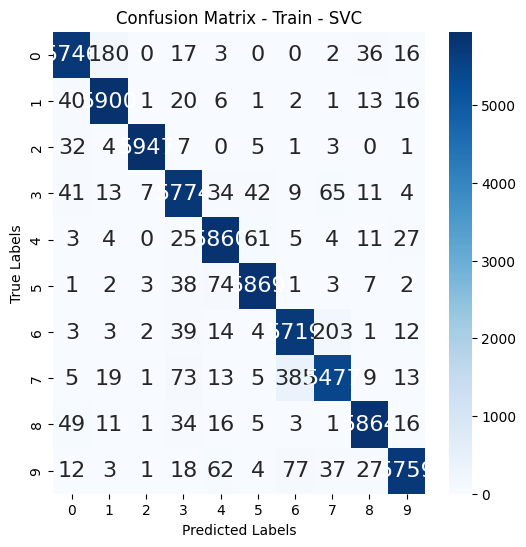

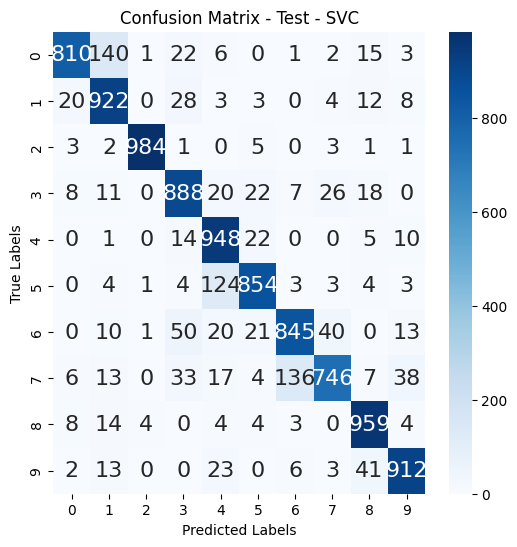

KNeighborsClassifier
*******Train************
Accuracy:  0.9740166666666666
Precision:  0.9741442076883498
Recall:  0.9740166666666666
F1 Score:  0.9740080264019189
*******Test************
Accuracy:  0.8798
Precision:  0.8830693108256968
Recall:  0.8798
F1 Score:  0.8787248369716574

 



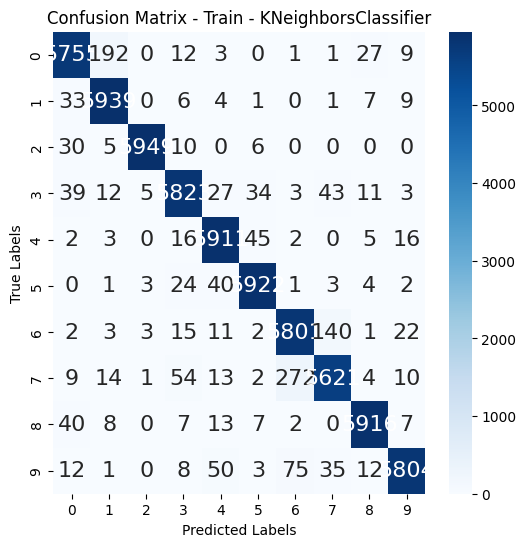

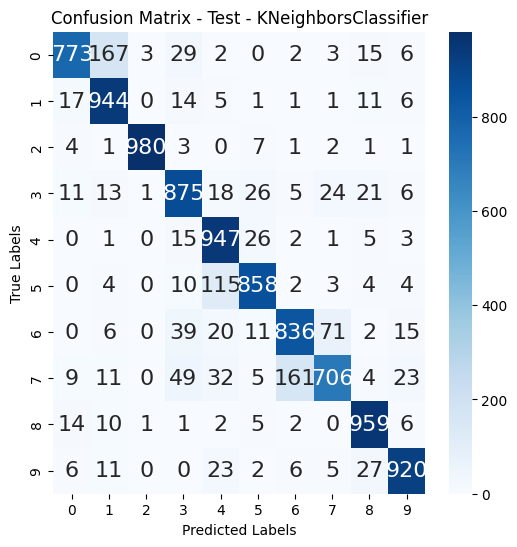

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
*******Train************
Accuracy:  0.9056833333333333
Precision:  0.9056258770579269
Recall:  0.9056833333333333
F1 Score:  0.9055728852530384
*******Test************
Accuracy:  0.8079
Precision:  0.8084180567846746
Recall:  0.8079
F1 Score:  0.8065326751384577

 



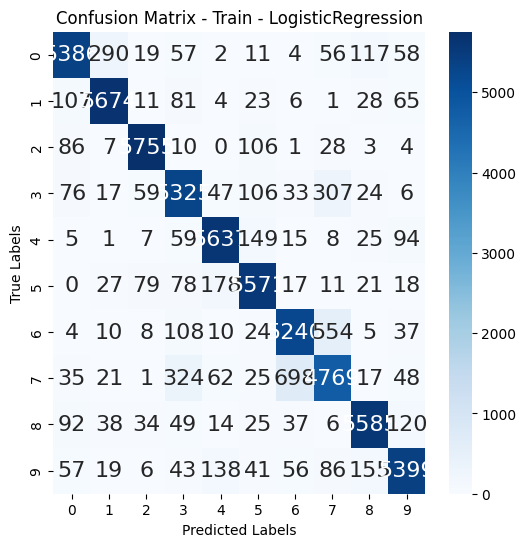

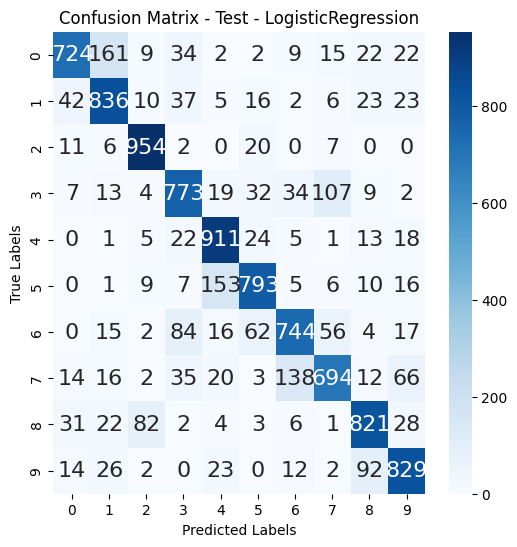

DecisionTreeClassifier
*******Train************
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
*******Test************
Accuracy:  0.7993
Precision:  0.7997537120978987
Recall:  0.7993
F1 Score:  0.7984318350676943

 



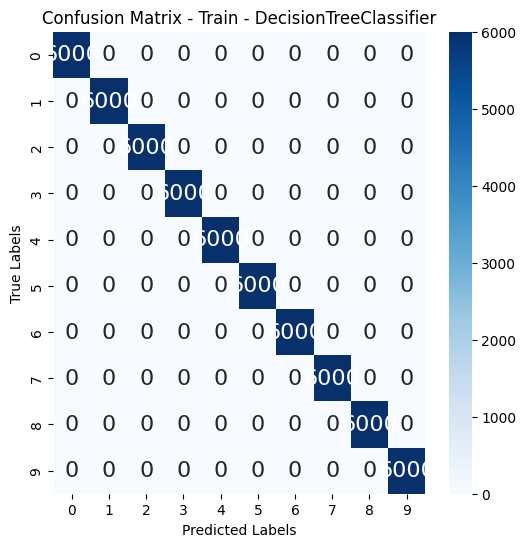

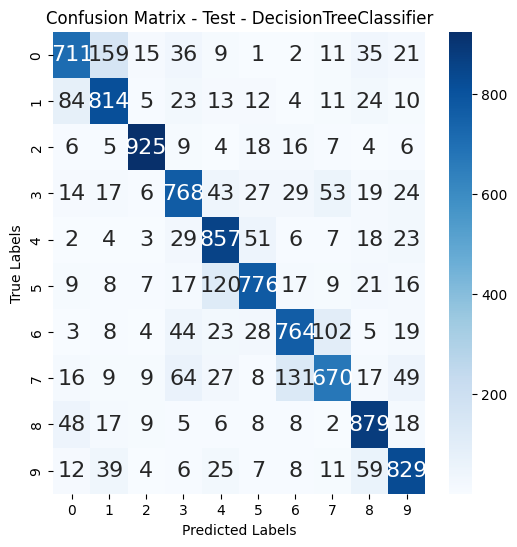

RandomForestClassifier
*******Train************
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
*******Test************
Accuracy:  0.875
Precision:  0.8780022071501792
Recall:  0.875
F1 Score:  0.8742984444704953

 



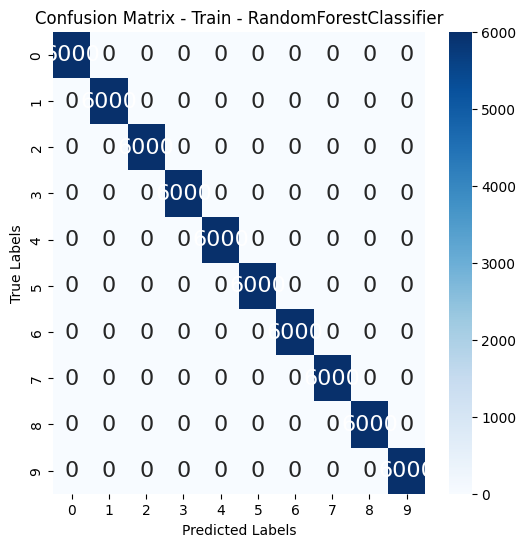

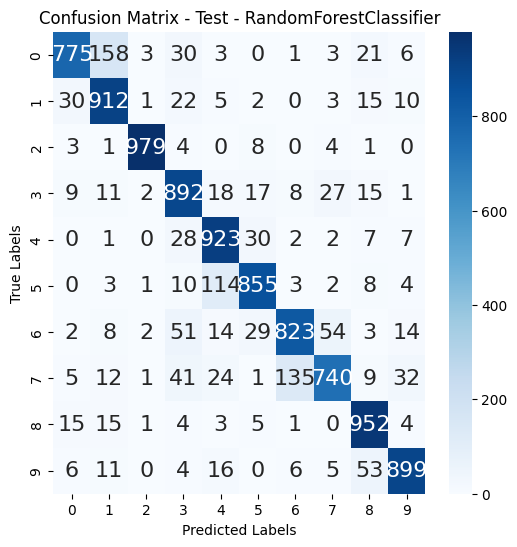

GaussianNB
*******Train************
Accuracy:  0.8676833333333334
Precision:  0.8685466380781874
Recall:  0.8676833333333334
F1 Score:  0.8676993560742856
*******Test************
Accuracy:  0.7723
Precision:  0.7792863388453616
Recall:  0.7723
F1 Score:  0.7709254314335268

 



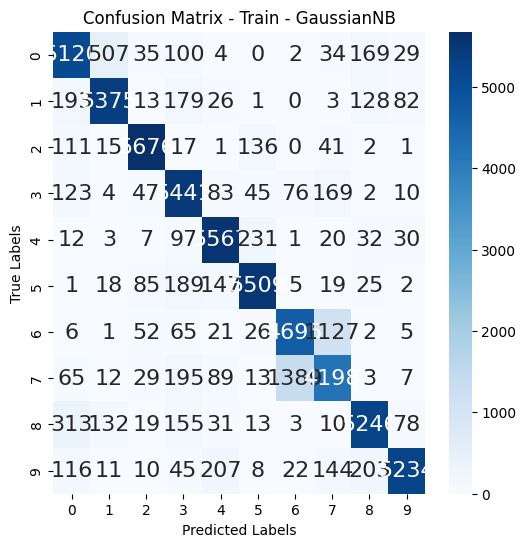

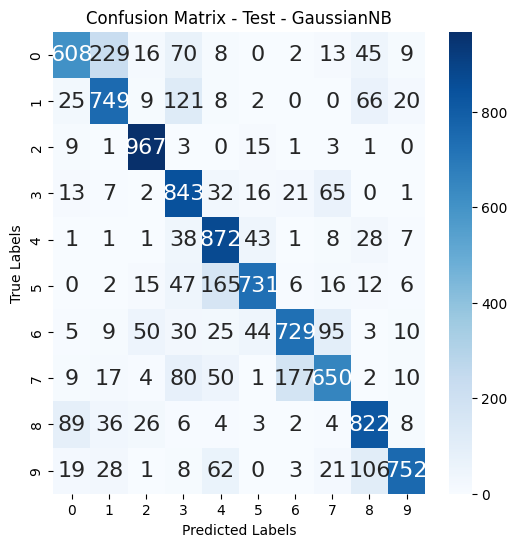

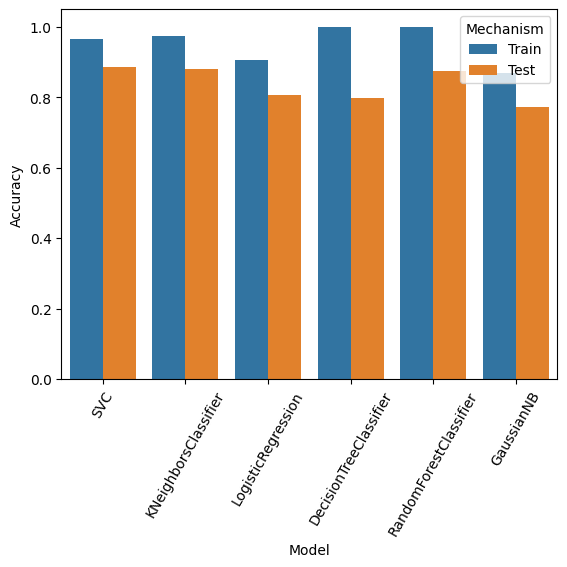

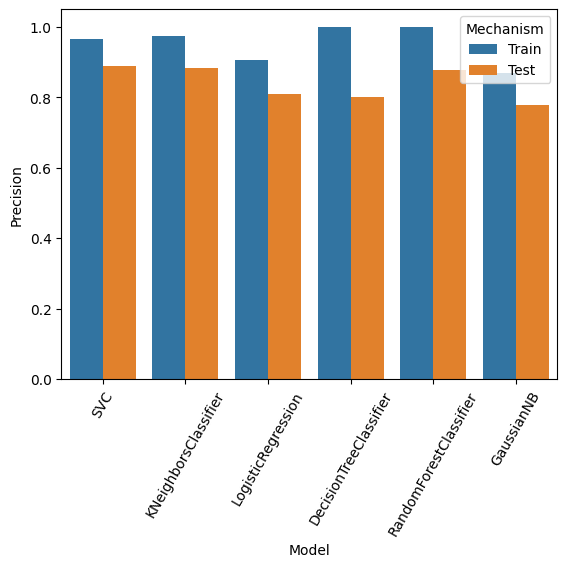

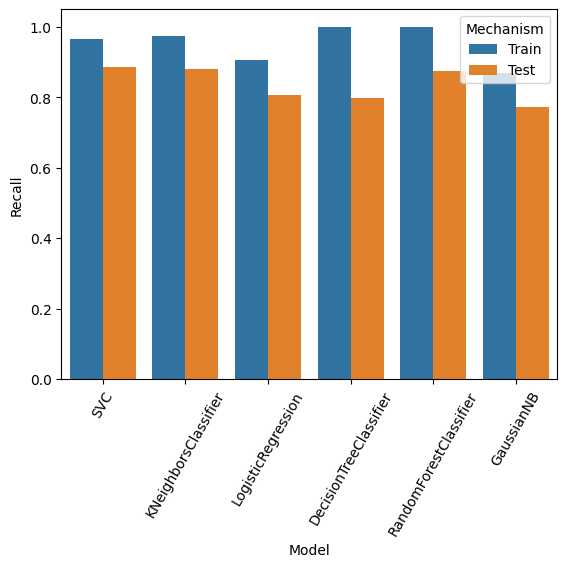

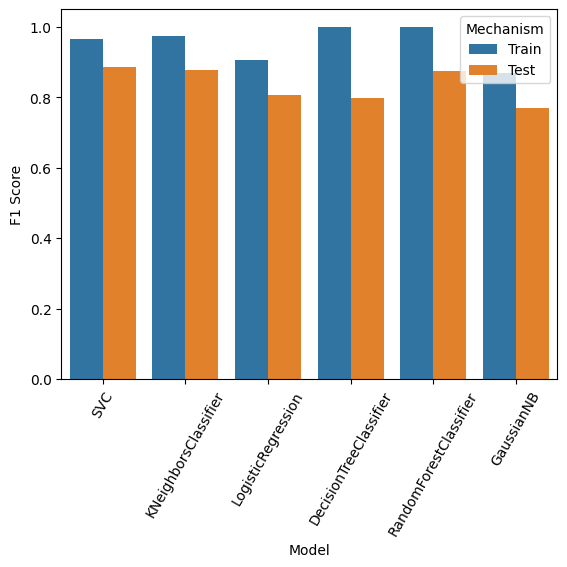

In [ ]:
models = [SVC(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
model_names = []
#models: A list of different classifiers to be evaluated.
#Metric Lists: Initialize empty lists to store performance metrics (Accuracy, Precision, Recall, F1 Score) for both training and testing datasets.
#model_names: List to store the names of the models for later use.
for model in models:
    model.fit(x_train_pca,y_train)
    train_pred = model.predict(x_train_pca)
    test_pred = model.predict(x_test_pca)
    #Loop Through Models: Iterate over each model in the models list.
    #Fit Model: Train (fit) the model using the PCA-transformed training data (x_train_pca) and true labels (y_train).
    #Predict: Predict labels for both training data (train_pred) and test data (test_pred).
    print(type(model).__name__)
    model_names.append(type(model).__name__)

    print("*******Train************")
    print("Accuracy: ",accuracy_score(y_train,train_pred))
    print("Precision: ",precision_score(y_train,train_pred, average='weighted'))
    print("Recall: ",recall_score(y_train,train_pred,average='weighted'))
    print("F1 Score: ",f1_score(y_train,train_pred,average='weighted'))
    train_accuracies.append(accuracy_score(y_train,train_pred))
    train_precisions.append(precision_score(y_train,train_pred,average='weighted'))
    train_recalls.append(recall_score(y_train,train_pred,average='weighted'))
    train_f1s.append(f1_score(y_train,train_pred,average='weighted'))
    #Print Model Type: Display the type of model being evaluated.
   #Append Model Name: Store the name of the model.
   #Calculate Metrics for Training Data: Compute and print Accuracy, Precision, Recall, and F1 Score using the accuracy_score,
   precision_score, recall_score, and f1_score functions, respectively. Store these metrics in the corresponding lists.
    print("*******Test************")
    print("Accuracy: ",accuracy_score(y_test,test_pred))
    print("Precision: ",precision_score(y_test,test_pred, average='weighted'))
    print("Recall: ",recall_score(y_test,test_pred,average='weighted'))
    print("F1 Score: ",f1_score(y_test,test_pred,average='weighted'))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    test_precisions.append(precision_score(y_test,test_pred,average='weighted'))
    test_recalls.append(recall_score(y_test,test_pred,average='weighted'))
    test_f1s.append(f1_score(y_test,test_pred,average='weighted'))
    print("\n \n")
    #Calculate Metrics for Test Data: Similar to the training data, compute and print Accuracy, Precision, Recall,
    and F1 Score for the test data, and store these metrics in the corresponding lists.

    # Calculate and display the confusion matrix for training data
    plot_confusion_matrices(y_train, train_pred, f"Confusion Matrix - Train - {type(model).__name__}")

    # Calculate and display the confusion matrix for testing data
    plot_confusion_matrices(y_test, test_pred, f"Confusion Matrix - Test - {type(model).__name__}")
    #Confusion Matrices: Plot confusion matrices for both training and test data to visualize classification performance in more detail.

train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = model_names

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = model_names

result_df = pd.concat([train_df, test_df])
#DataFrames: Create train_df and test_df DataFrames to store the metrics for training and test datasets, respectively.
#Concatenate: Combine train_df and test_df into a single DataFrame result_df for easier plotting and comparison.
for metric in ['Accuracy','Precision','Recall','F1 Score']:
    sns.barplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
    plt.xticks(rotation=60)
    plt.show()
    #Loop Through Metrics: For each metric (Accuracy, Precision, Recall, F1 Score):
    #Bar Plot: Use Seaborn’s barplot to create bar charts showing the metric values for different models, with different colors for training and test data (controlled by the hue parameter).
    #Rotation: Rotate x-axis labels for better readability.
    #Display: Show the plot.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


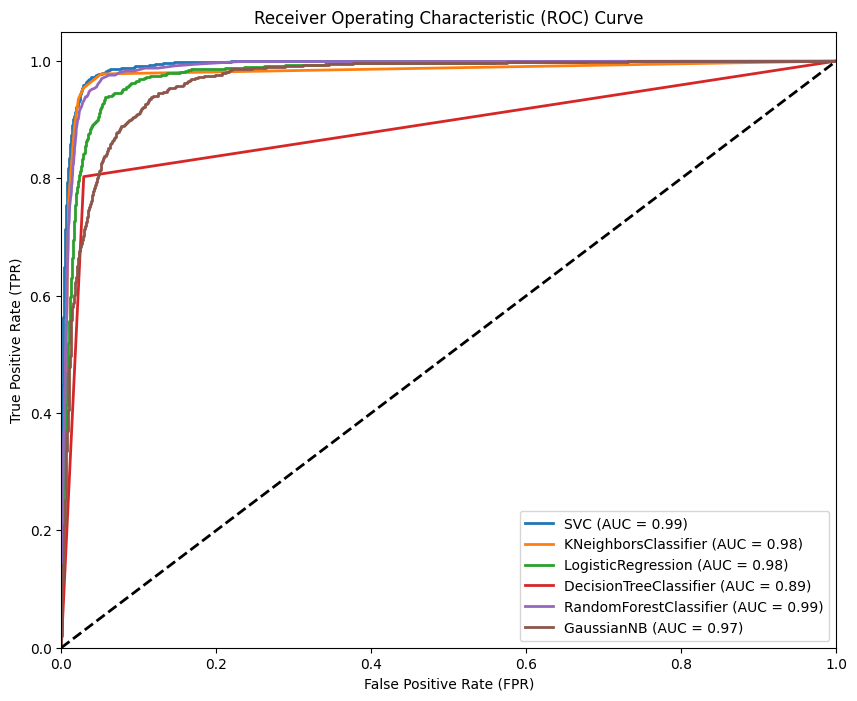

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#roc_curve: Computes the False Positive Rate (FPR) and True Positive Rate (TPR) for different threshold values.
#auc: Calculates the Area Under the ROC Curve.
#seaborn: For advanced data visualization (though not used directly in this snippet).
#matplotlib.pyplot: For plotting the ROC curves.

# Lists to store ROC curve data
fpr_list = []
tpr_list = []
roc_auc_list = []
model_names = []

models = [SVC(probability=True), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()]
#Lists:
#fpr_list, tpr_list, roc_auc_list: To store the FPR, TPR, and AUC for each model.
#model_names: To store the names of the models for labeling the plot.
#models: List of different classifiers to evaluate. Note that SVC(probability=True) is used to enable probability predictions.
for model in models:
    model_name = type(model).__name__
    model_names.append(model_name)

    model.fit(x_train_pca, y_train)

    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(x_test_pca)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1],pos_label=1)
    elif isinstance(model, KNeighborsClassifier):
        # For K-Nearest Neighbors, calculate probabilities based on distances to neighbors
        distances, indices = model.kneighbors(x_test_pca)
        neighbor_labels = y_train[indices]
        # Assign a probability score based on the majority class of neighbors
        y_pred_prob = np.mean(neighbor_labels, axis=1)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    else:
        raise ValueError("Model not supported for ROC curve calculation.")

    fpr_list.append(fpr)
    tpr_list.append(tpr)

    # Calculate ROC-AUC score
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)
    #Model Training:
#model.fit(x_train_pca, y_train): Trains the model using the PCA-transformed training data.
ROC Curve Calculation:
#Probability Models: If the model has a predict_proba method (like SVC, LogisticRegression, RandomForestClassifier, GaussianNB), the probability scores for the positive class are used to compute the ROC curve.
#y_pred_prob[:, 1] selects the probabilities for the positive class (assuming binary classification).
#roc_curve(y_test, y_pred_prob[:, 1], pos_label=1) calculates the FPR and TPR for the ROC curve.
#K-Nearest Neighbors (KNN): For KNN, calculate probabilities based on distances to neighbors.
#model.kneighbors(x_test_pca) returns distances and indices of neighbors.
#neighbor_labels = y_train[indices] retrieves the labels of the neighbors.
#y_pred_prob = np.mean(neighbor_labels, axis=1) assigns a probability score based on the majority class of neighbors.
#roc_curve(y_test, y_pred_prob) computes the ROC curve using these probability scores.
#Error Handling: If a model does not support ROC calculation, an error is raised.
#Store Results:
#Append FPR and TPR to fpr_list and tpr_list, respectively.
#Compute AUC using auc(fpr, tpr) and append it to roc_auc_list.

# Plot ROC-AUC curves for all models
plt.figure(figsize=(10, 8))
for i in range(len(models)):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#Plot Setup:
#plt.figure(figsize=(10, 8)) creates a figure with a size of 10x8 inches.
Plot ROC Curves:
#plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc_list[i]:.2f})') plots the ROC curve for each model, with the AUC value as part of the label.
Diagonal Line:
#plt.plot([0, 1], [0, 1], 'k--', lw=2) adds a diagonal dashed line representing the ROC curve of a random classifier.
Axis Limits and Labels:
#Set the limits and labels for the x-axis and y-axis.
Title and Legend:
#Set the title for the plot and add a legend in the lower right corner.